In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras import layers
from keras import models
from keras import optimizers
from keras.utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import time

Using TensorFlow backend.
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
# import data as pandas data frame, change according to your path
start = time.time()
train_data = pd.read_csv("/home/ooa/Belgeler/git/BLG-527/hw3/Data/optdigits.tra", header=None)
test_data = pd.read_csv("/home/ooa/Belgeler/git/BLG-527/hw3/Data/optdigits.tes", header=None)

In [3]:
train_data = train_data.values
test_data = test_data.values

y_train = train_data[:,64]
y_test = test_data[:,64]

X_train = train_data[:,:64]
X_test = test_data[:,:64]

#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

X_train = X_train.reshape((3823, 8, 8))
X_train = X_train.reshape((3823, 8, 8, 1))
X_train = X_train.astype('float32') / 16

X_test = X_test.reshape((1797, 8, 8))
X_test = X_test.reshape((1797, 8, 8, 1))
X_test = X_test.astype('float32') / 16

'''X_val = X_val.reshape((765, 8, 8))
X_val = X_val.reshape((765, 8, 8, 1))
X_val = X_val.astype('float32') / 16
'''

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
#y_val= to_categorical(y_val)

In [4]:
def dnn(optimizer='rmsprop'):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(8, 8, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    #model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer=optimizer,loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn = dnn, verbose=0)

In [5]:
batch_size = [32, 64, 128]
epochs = [5, 10, 20]
optimizers = ['rmsprop', 'adam', 'Adagrad']
param_grid = dict(optimizer=optimizers, batch_size=batch_size, epochs=epochs)

In [6]:
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train, y_train)

In [16]:
grid_result.best_params_

{'batch_size': 32, 'epochs': 20, 'optimizer': 'rmsprop'}

In [8]:
cvres = grid_result.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.938791525011564 {'batch_size': 32, 'epochs': 5, 'optimizer': 'rmsprop'}
0.9628563953138227 {'batch_size': 32, 'epochs': 5, 'optimizer': 'adam'}
0.9628563953138227 {'batch_size': 32, 'epochs': 5, 'optimizer': 'Adagrad'}
0.9618100962993084 {'batch_size': 32, 'epochs': 10, 'optimizer': 'rmsprop'}
0.9712267852783703 {'batch_size': 32, 'epochs': 10, 'optimizer': 'adam'}
0.9686110384514779 {'batch_size': 32, 'epochs': 10, 'optimizer': 'Adagrad'}
0.9801203243526027 {'batch_size': 32, 'epochs': 20, 'optimizer': 'rmsprop'}
0.9788124507676548 {'batch_size': 32, 'epochs': 20, 'optimizer': 'adam'}
0.9761967041590374 {'batch_size': 32, 'epochs': 20, 'optimizer': 'Adagrad'}
0.9442845930798716 {'batch_size': 64, 'epochs': 5, 'optimizer': 'rmsprop'}
0.9565786035342145 {'batch_size': 64, 'epochs': 5, 'optimizer': 'adam'}
0.959455924105214 {'batch_size': 64, 'epochs': 5, 'optimizer': 'Adagrad'}
0.9678263147245861 {'batch_size': 64, 'epochs': 10, 'optimizer': 'rmsprop'}
0.969395762739648 {'batch_size':

In [9]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(8, 8, 1)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))
model2.compile(optimizer=grid_result.best_params_['optimizer'],loss='categorical_crossentropy',
                metrics=['accuracy'])

In [10]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_165 (Conv2D)          (None, 6, 6, 32)          320       
_________________________________________________________________
max_pooling2d_83 (MaxPooling (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_166 (Conv2D)          (None, 1, 1, 64)          18496     
_________________________________________________________________
flatten_83 (Flatten)         (None, 64)                0         
_________________________________________________________________
dense_165 (Dense)            (None, 512)               33280     
_________________________________________________________________
dense_166 (Dense)            (None, 10)                5130      
Total params: 57,226
Trainable params: 57,226
Non-trainable params: 0
_________________________________________________________________


In [11]:
history2 = model2.fit(X_train, y_train, validation_split=0.2, epochs=grid_result.best_params_['epochs'],
                      batch_size=grid_result.best_params_['batch_size'])

Train on 3058 samples, validate on 765 samples
Epoch 1/20
3058/3058 [==============================] - 3s 848us/step - loss: 1.1129 - acc: 0.7247 - val_loss: 0.4898 - val_acc: 0.8523
Epoch 2/20
3058/3058 [==============================] - 0s 162us/step - loss: 0.2861 - acc: 0.9182 - val_loss: 0.2243 - val_acc: 0.9346
Epoch 3/20
3058/3058 [==============================] - 0s 160us/step - loss: 0.1916 - acc: 0.9434 - val_loss: 0.1530 - val_acc: 0.9542
Epoch 4/20
3058/3058 [==============================] - 0s 162us/step - loss: 0.1450 - acc: 0.9542 - val_loss: 0.1484 - val_acc: 0.9582
Epoch 5/20
3058/3058 [==============================] - 0s 160us/step - loss: 0.1182 - acc: 0.9689 - val_loss: 0.1211 - val_acc: 0.9739
Epoch 6/20
3058/3058 [==============================] - 0s 157us/step - loss: 0.1005 - acc: 0.9689 - val_loss: 0.1758 - val_acc: 0.9451
Epoch 7/20
3058/3058 [==============================] - 0s 162us/step - loss: 0.0884 - acc: 0.9748 - val_loss: 0.1374 - val_acc: 0.9542
E

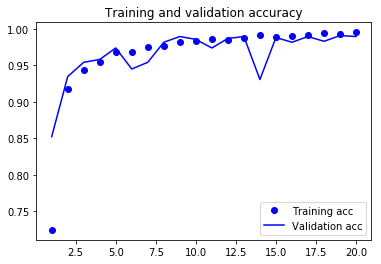

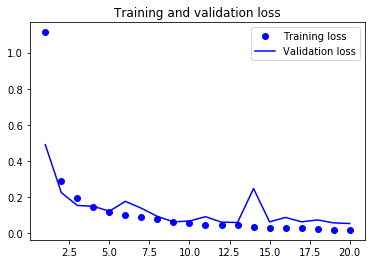

In [12]:
acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [13]:
y_pred_test_2 = model2.predict_classes(X_test)
y_pred_train_2 = model2.predict_classes(X_train)

In [14]:
test_loss, test_acc = model2.evaluate(X_test, y_test)
print("Test accuracy is ", test_acc)

1797/1797 [==============================] - 0s 70us/step
Test accuracy is  0.9721758486366165


In [18]:
train_loss, train_acc = model2.evaluate(X_train, y_train)
print("Train accuracy is ", train_acc)

3823/3823 [==============================] - 0s 74us/step
Train accuracy is  0.9955532304472927


In [15]:
end = time.time()
print(end - start)

351.45894622802734
